## Importing necessary libraries:

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset:

In [126]:
proj1=pd.read_csv("Los_Angeles_International_Airport_-_Passenger_Traffic_By_Terminal.csv")
proj1

,DataExtractDate,ReportPeriod,Terminal,Arrival_Departure,Domestic_International,Passenger_Count
0,05/10/2021 06:01:09 AM,04/01/2021 12:00:00 AM,T1,Departure,Domestic,160413
1,05/03/2021 03:08:02 PM,03/01/2021 12:00:00 AM,T5,Departure,Domestic,223866
2,05/27/2021 03:16:34 PM,04/01/2021 12:00:00 AM,T5,Departure,Domestic,266035
3,07/10/2021 06:01:27 AM,06/01/2021 12:00:00 AM,T6,Arrival,International,6195
4,05/10/2021 06:01:09 AM,04/01/2021 12:00:00 AM,T8,Arrival,Domestic,54925
...,...,...,...,...,...,...
7878,11/18/2023 05:28:20 AM,10/01/2023 12:00:00 AM,TBIT,Arrival,International,564276
7879,11/14/2023 05:28:19 AM,10/01/2023 12:00:00 AM,TBIT West Gates,Arrival,International,237837
7880,11/15/2023 05:28:26 AM,10/01/2023 12:00:00 AM,TBIT,Departure,Domestic,77173
7881,11/15/2023 05:28:26 AM,10/01/2023 12:00:00 AM,T2,Arrival,Domestic,302039


### Exploring the data:

In [127]:
proj1.head()

,DataExtractDate,ReportPeriod,Terminal,Arrival_Departure,Domestic_International,Passenger_Count
0,05/10/2021 06:01:09 AM,04/01/2021 12:00:00 AM,T1,Departure,Domestic,160413
1,05/03/2021 03:08:02 PM,03/01/2021 12:00:00 AM,T5,Departure,Domestic,223866
2,05/27/2021 03:16:34 PM,04/01/2021 12:00:00 AM,T5,Departure,Domestic,266035
3,07/10/2021 06:01:27 AM,06/01/2021 12:00:00 AM,T6,Arrival,International,6195
4,05/10/2021 06:01:09 AM,04/01/2021 12:00:00 AM,T8,Arrival,Domestic,54925


In [128]:
proj1.dtypes

DataExtractDate           object
ReportPeriod              object
Terminal                  object
Arrival_Departure         object
Domestic_International    object
Passenger_Count            int64
dtype: object

In [129]:
proj1.describe()

,Passenger_Count
count,7883.000000
mean,150115.125079
std,152305.478195
min,0.000000
25%,19849.500000
50%,97231.000000
75%,259746.500000
max,908951.000000


## Data Cleaning:

### Checking for missing values:

In [130]:
proj1.isnull().sum()

DataExtractDate           0
ReportPeriod              0
Terminal                  0
Arrival_Departure         0
Domestic_International    0
Passenger_Count           0
dtype: int64

### Converting to date and time:

In [131]:
proj1['DataExtractDate'] = pd.to_datetime(proj1['DataExtractDate'])

# Create new columns for date and time
proj1['EXDate'] = proj1['DataExtractDate'].dt.date
proj1['EXTime'] = proj1['DataExtractDate'].dt.time

In [132]:
proj1['ReportPeriod'] = pd.to_datetime(proj1['ReportPeriod'], format='%m/%d/%Y %I:%M:%S %p')

# Create a new column for date
proj1['RPTDate'] = proj1['ReportPeriod'].dt.date

In [133]:
proj1.head()

,DataExtractDate,ReportPeriod,Terminal,Arrival_Departure,Domestic_International,Passenger_Count,EXDate,EXTime,RPTDate
0,2021-05-10 06:01:09,2021-04-01,T1,Departure,Domestic,160413,2021-05-10,06:01:09,2021-04-01
1,2021-05-03 15:08:02,2021-03-01,T5,Departure,Domestic,223866,2021-05-03,15:08:02,2021-03-01
2,2021-05-27 15:16:34,2021-04-01,T5,Departure,Domestic,266035,2021-05-27,15:16:34,2021-04-01
3,2021-07-10 06:01:27,2021-06-01,T6,Arrival,International,6195,2021-07-10,06:01:27,2021-06-01
4,2021-05-10 06:01:09,2021-04-01,T8,Arrival,Domestic,54925,2021-05-10,06:01:09,2021-04-01


### Converting columns to appropriate data types:

In [134]:
proj1['Domestic_International'] = proj1['Domestic_International'].astype('category') 
proj1['Arrival_Departure'] = proj1['Arrival_Departure'].astype('category') 
proj1['Terminal'] = proj1['Terminal'].astype('str') 

In [135]:
proj1['Passenger_Count'] = pd.to_numeric(proj1['Passenger_Count'], errors='coerce')
proj1 = proj1[~proj1['Terminal'].isin(['Imperial Terminal', 'Miscellaneous Terminal'])]
proj1.loc[proj1['Terminal'] == 'TBIT West Gates', 'Terminal'] = 'TBIT_WG'

In [136]:
proj1

,DataExtractDate,ReportPeriod,Terminal,Arrival_Departure,Domestic_International,Passenger_Count,EXDate,EXTime,RPTDate
0,2021-05-10 06:01:09,2021-04-01,T1,Departure,Domestic,160413,2021-05-10,06:01:09,2021-04-01
1,2021-05-03 15:08:02,2021-03-01,T5,Departure,Domestic,223866,2021-05-03,15:08:02,2021-03-01
2,2021-05-27 15:16:34,2021-04-01,T5,Departure,Domestic,266035,2021-05-27,15:16:34,2021-04-01
3,2021-07-10 06:01:27,2021-06-01,T6,Arrival,International,6195,2021-07-10,06:01:27,2021-06-01
4,2021-05-10 06:01:09,2021-04-01,T8,Arrival,Domestic,54925,2021-05-10,06:01:09,2021-04-01
...,...,...,...,...,...,...,...,...,...
7878,2023-11-18 05:28:20,2023-10-01,TBIT,Arrival,International,564276,2023-11-18,05:28:20,2023-10-01
7879,2023-11-14 05:28:19,2023-10-01,TBIT_WG,Arrival,International,237837,2023-11-14,05:28:19,2023-10-01
7880,2023-11-15 05:28:26,2023-10-01,TBIT,Departure,Domestic,77173,2023-11-15,05:28:26,2023-10-01
7881,2023-11-15 05:28:26,2023-10-01,T2,Arrival,Domestic,302039,2023-11-15,05:28:26,2023-10-01


### Dropping the missing values and duplicates:

In [137]:
proj1 = proj1.dropna()
proj1 = proj1.drop_duplicates()

In [138]:
proj1.head()

,DataExtractDate,ReportPeriod,Terminal,Arrival_Departure,Domestic_International,Passenger_Count,EXDate,EXTime,RPTDate
0,2021-05-10 06:01:09,2021-04-01,T1,Departure,Domestic,160413,2021-05-10,06:01:09,2021-04-01
1,2021-05-03 15:08:02,2021-03-01,T5,Departure,Domestic,223866,2021-05-03,15:08:02,2021-03-01
2,2021-05-27 15:16:34,2021-04-01,T5,Departure,Domestic,266035,2021-05-27,15:16:34,2021-04-01
3,2021-07-10 06:01:27,2021-06-01,T6,Arrival,International,6195,2021-07-10,06:01:27,2021-06-01
4,2021-05-10 06:01:09,2021-04-01,T8,Arrival,Domestic,54925,2021-05-10,06:01:09,2021-04-01


In [139]:
proj1.columns

Index(['DataExtractDate', 'ReportPeriod', 'Terminal', 'Arrival_Departure',
       'Domestic_International', 'Passenger_Count', 'EXDate', 'EXTime',
       'RPTDate'],
      dtype='object')

In [140]:
# Calculate average passenger count for each combination of Arrival_Departure, Domestic_International, and Terminal
average_passenger_count = proj1.groupby(['Arrival_Departure', 'Domestic_International', 'Terminal'])['Passenger_Count'].mean().reset_index()

# Create a new DataFrame to represent average counts
average_counts_df = pd.pivot_table(average_passenger_count, values='Passenger_Count', 
                                   index=['Terminal'], 
                                   columns=['Arrival_Departure', 'Domestic_International'], 
                                   aggfunc='mean', fill_value=0)

# Flatten the MultiIndex columns
average_counts_df.columns = ['_'.join(col).strip() for col in average_counts_df.columns.values]

# Display the new DataFrame
average_counts_df

,Arrival_Domestic,Arrival_International,Departure_Domestic,Departure_International
Terminal,,,,
T1,354044.378505,0.000000,352428.593458,3292.901639
T2,132597.121495,131873.090909,131786.630841,137353.929907
T3,231852.354167,17026.396226,226932.729167,35032.740741
T4,344668.018692,29768.300493,336670.509346,42883.261682
T5,290258.443925,28740.522472,296076.771028,26274.248804
T6,232399.327103,24997.601896,228366.733645,51404.897196
T7,254699.471963,48606.201878,260751.584112,36930.633803
T8,125758.380282,3570.039326,124034.727700,7050.449495
TBIT,10769.109827,463822.528037,27219.680851,400906.485981


## Exploratory Data analysis (EDA):

### 1. Average Arrival Passenger Count by Terminal:

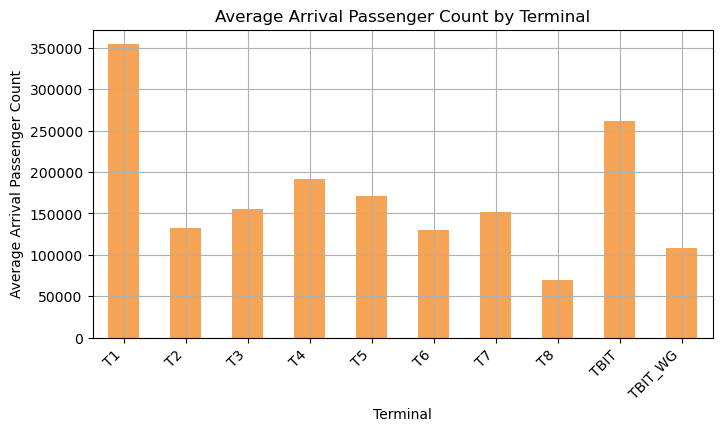

In [141]:
terminal_order = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'TBIT', 'TBIT_WG']
average_arrival_counts = proj1[proj1['Arrival_Departure'] == 'Arrival'].groupby('Terminal')['Passenger_Count'].mean().reindex(terminal_order)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

# Plotting a bar graph of average arrival passenger count by terminal
average_arrival_counts.plot(kind='bar', ax=ax, color='#f5a455')

# Set labels and title
ax.set_xlabel('Terminal')
ax.set_ylabel('Average Arrival Passenger Count')
ax.set_title('Average Arrival Passenger Count by Terminal')
plt.grid(True)
plt.xticks(rotation=45, ha='right') 

# Show the plot
plt.show()

In [142]:
# Option 2: Select which one is better so we can make everything in that way. 

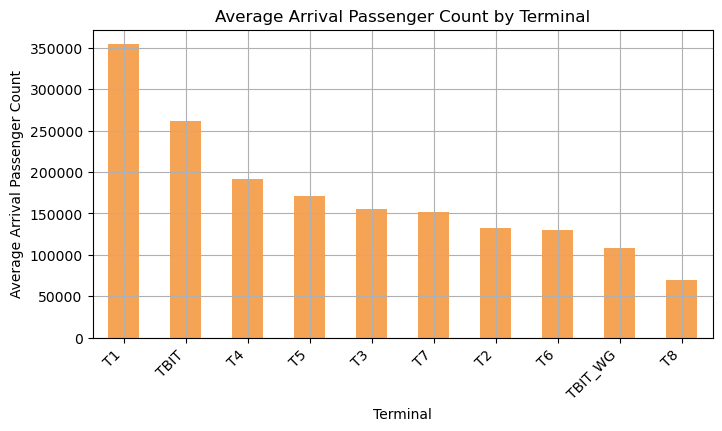

In [143]:
# Calculate average arrival counts for each terminal
average_arrival_counts = proj1[proj1['Arrival_Departure'] == 'Arrival'].groupby('Terminal')['Passenger_Count'].mean().reindex(terminal_order)

# Sort the DataFrame by average arrival counts
average_arrival_counts_sorted = average_arrival_counts.sort_values(ascending=False)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

# Plotting a bar graph of average arrival passenger count by terminal
average_arrival_counts_sorted.plot(kind='bar', ax=ax, color='#f5a455')

ax.set_xlabel('Terminal')
ax.set_ylabel('Average Arrival Passenger Count')
ax.set_title('Average Arrival Passenger Count by Terminal')
plt.grid(True)
plt.xticks(rotation=45, ha='right') 
plt.show()

### 2. Average Departure Passenger Count by Terminal:

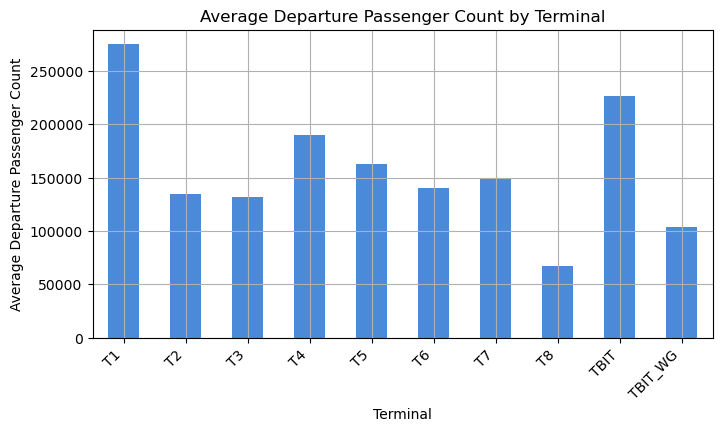

In [144]:
average_departure_counts = proj1[proj1['Arrival_Departure'] == 'Departure'].groupby('Terminal')['Passenger_Count'].mean().reindex(terminal_order)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

# Plotting a bar graph of average arrival passenger count by terminal
average_departure_counts.plot(kind='bar', ax=ax, color='#4b89d9')

# Set labels and title
ax.set_xlabel('Terminal')
ax.set_ylabel('Average Departure Passenger Count')
ax.set_title('Average Departure Passenger Count by Terminal')

plt.xticks(rotation=45, ha='right') 
plt.grid(True)
plt.show()

### 3. Average Counts Based on Arrival/Departure and Terminal:

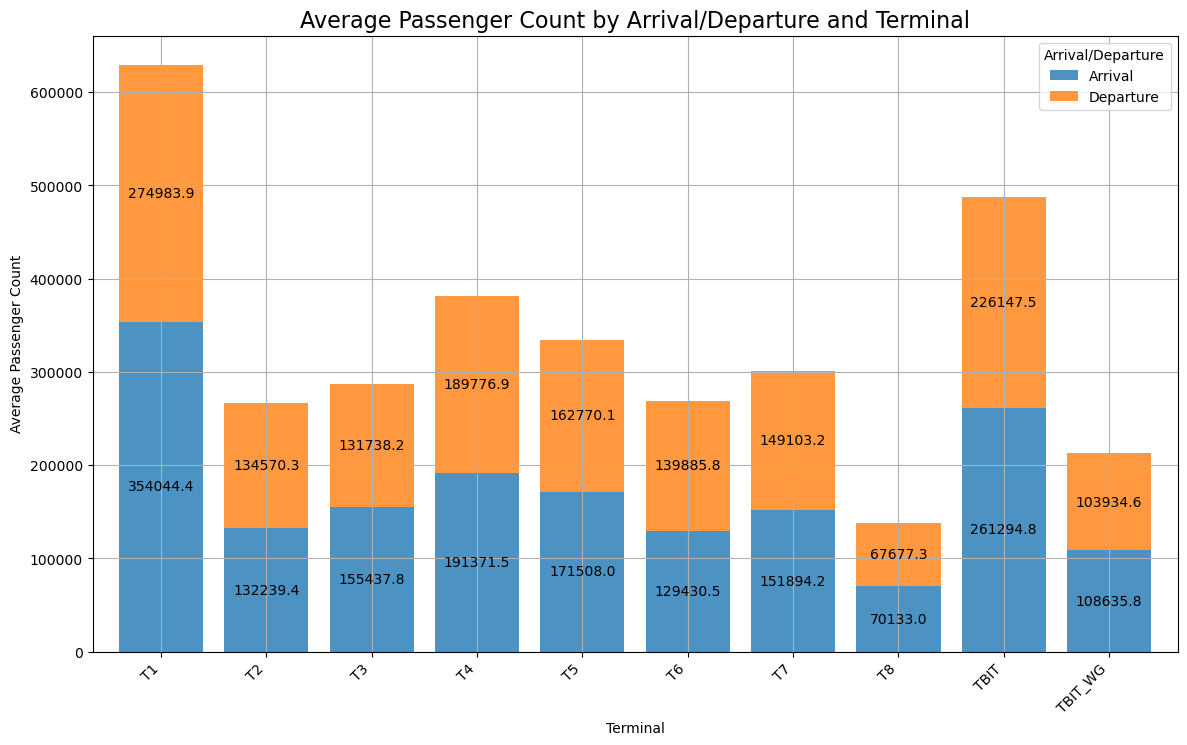

In [145]:
# Calculate average arrival and departure counts for each terminal
average_counts = proj1.groupby(['Terminal', 'Arrival_Departure'])['Passenger_Count'].mean().unstack().reindex(terminal_order)

fig, ax = plt.subplots(figsize=(14, 8))
bars = average_counts.plot(kind='bar', stacked=True, width=0.8, ax=ax, alpha=0.8)

# Set labels and title
ax.set_xlabel('Terminal')
ax.set_ylabel('Average Passenger Count')
ax.set_title('Average Passenger Count by Arrival/Departure and Terminal',fontsize = 16)
ax.legend(title='Arrival/Departure')

# Add values inside the bars
for bar in bars.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy() 
    ax.annotate(f'{height:.1f}', (x + width/2, y + height/2), ha='center', va='center')

plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.show()

### 4. Distribution of Passengers between Domestic and International Flights:

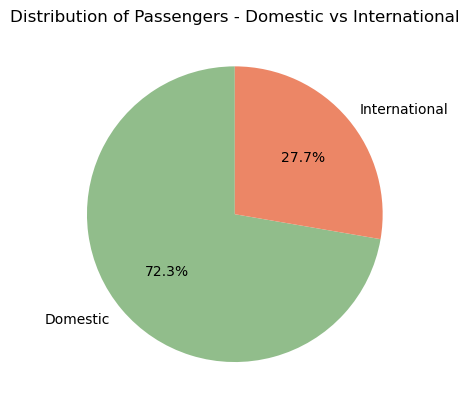

In [146]:
# Calculate the total passenger count for domestic and international flights
passenger_distribution = proj1.groupby('Domestic_International')['Passenger_Count'].sum()

# Set up the figure and axes
fig, ax = plt.subplots()

# Plotting a pie chart for the distribution of passengers
ax.pie(passenger_distribution, labels=passenger_distribution.index, autopct='%1.1f%%', colors=['#91bd8b', '#ec8666'], startangle=90)

# Set title
ax.set_title('Distribution of Passengers - Domestic vs International')

# Show the pie chart
plt.show()

### 5. Overall Peak times at LAX:

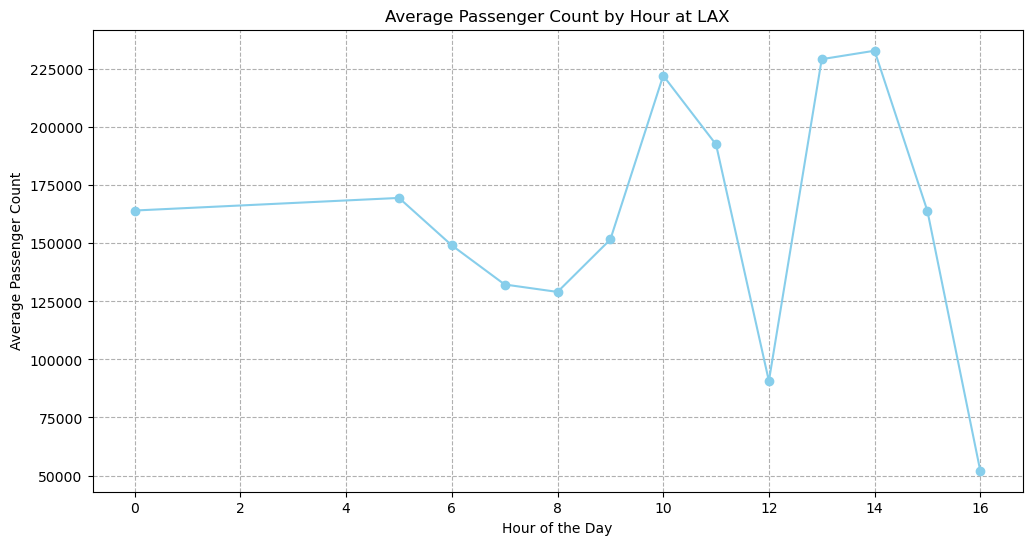

In [147]:
proj1['Hour'] = proj1['DataExtractDate'].dt.hour

# Calculate the average passenger count for each hour
average_hourly_counts = proj1.groupby('Hour')['Passenger_Count'].mean()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting a line graph of average passenger count by hour
average_hourly_counts.plot(marker='o', linestyle='-', color='skyblue')

# Set labels and title
plt.title('Average Passenger Count by Hour at LAX')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.grid(True, linestyle = '--')

# Show the plot
plt.show()

### 6. Peak times for domestic and international flights:

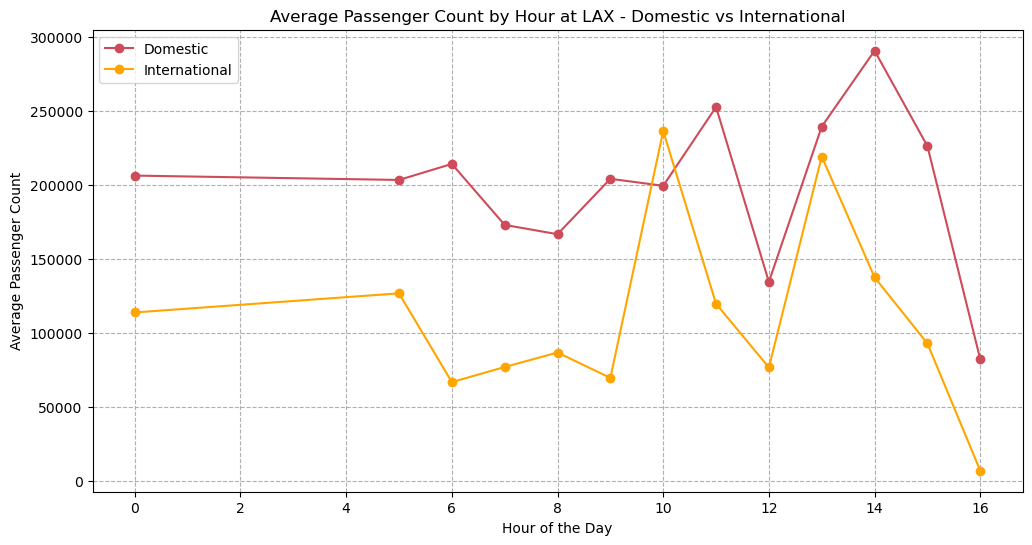

In [148]:
plt.figure(figsize=(12, 6))
domestic_data = proj1[proj1['Domestic_International'] == 'Domestic']
domestic_hourly_counts = domestic_data.groupby('Hour')['Passenger_Count'].mean()
domestic_hourly_counts.plot(marker='o', linestyle='-', color='#ce4b5a', label='Domestic')

# Plotting line graph for international flights
international_data = proj1[proj1['Domestic_International'] == 'International']
international_hourly_counts = international_data.groupby('Hour')['Passenger_Count'].mean()
international_hourly_counts.plot(marker='o', linestyle='-', color='orange', label='International')

# Set labels and title
plt.title('Average Passenger Count by Hour at LAX - Domestic vs International')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')

# Add legend
plt.legend()
plt.grid(True, linestyle = '--')

# Show the plot
plt.show()

### 7. Total Passenger Count by Terminal with Busiest Terminal Highlighted:

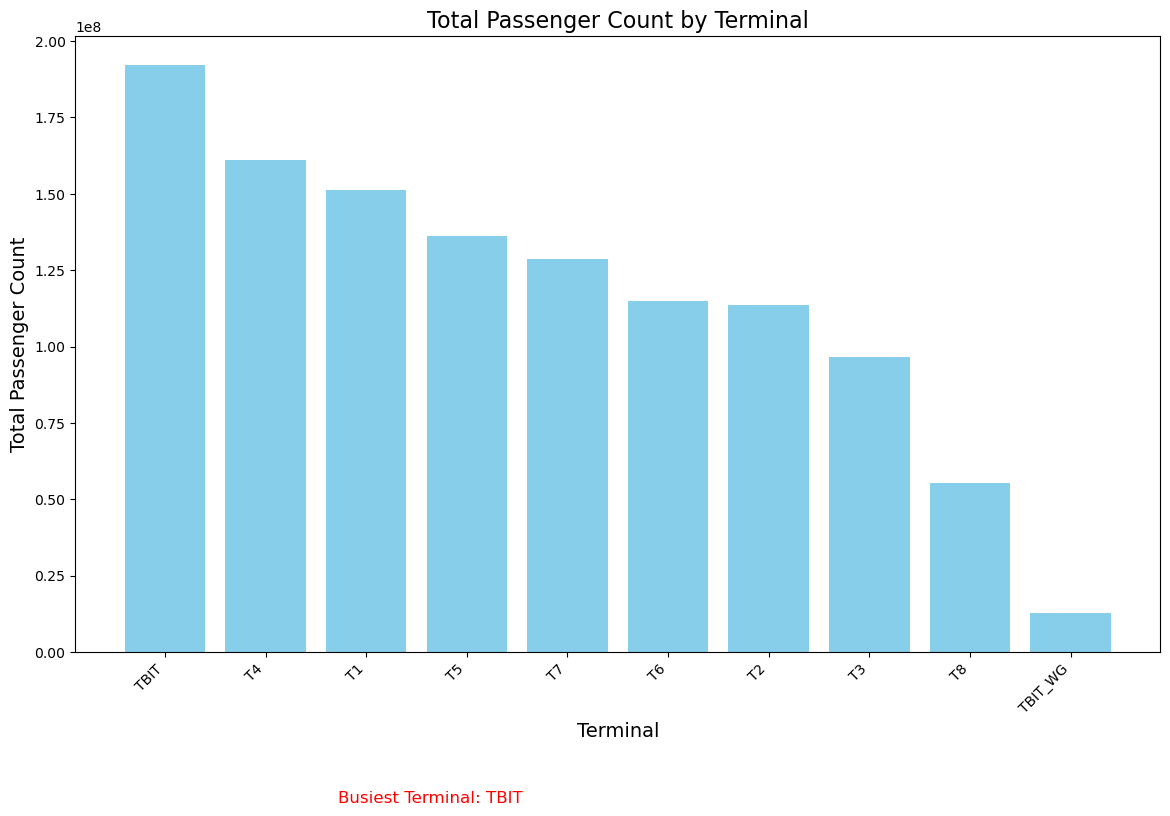

In [149]:
# Calculate total passenger count for each terminal
terminal_total_passengers = proj1.groupby('Terminal')['Passenger_Count'].sum().reset_index()

# Sort the DataFrame by total passenger count
terminal_total_passengers_sorted = terminal_total_passengers.sort_values(by='Passenger_Count', ascending=False)

# Find the busiest terminal
busiest_terminal = terminal_total_passengers_sorted.iloc[0]['Terminal']

fig, ax = plt.subplots(figsize=(14, 8))
ax.bar(terminal_total_passengers_sorted['Terminal'], terminal_total_passengers_sorted['Passenger_Count'], color='skyblue')

# Set labels and title
ax.set_title('Total Passenger Count by Terminal',fontsize = 16)
ax.set_xlabel('Terminal',fontsize = 14)
ax.set_ylabel('Total Passenger Count',fontsize = 14)

# Annotate the busiest terminal
ax.annotate(f'Busiest Terminal: {busiest_terminal}', xy=(2.5, 0), xytext=(10, -100),
             textcoords='offset points', ha='center', va='top', fontsize=12, color='red')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [151]:
proj1.columns

Index(['DataExtractDate', 'ReportPeriod', 'Terminal', 'Arrival_Departure',
       'Domestic_International', 'Passenger_Count', 'EXDate', 'EXTime',
       'RPTDate', 'Hour'],
      dtype='object')

### Statistical Analysis:

#### Chi-square test to assess the independence of the Terminal and Arrival/Departure:

In [152]:
from scipy.stats import chi2_contingency

terminal_arrival_contingency = pd.crosstab(proj1['Terminal'], proj1['Arrival_Departure'])
chi2_stat, p_value, _, _ = chi2_contingency(terminal_arrival_contingency)

if p_value < 0.05:
    print("The Terminal and Arrival/Departure are not independent.")
else:
    print("There is no significant relationship between Terminal and Arrival/Departure categories.")

There is no significant relationship between Terminal and Arrival/Departure categories.


#### ANOVA for Terminal Comparison:

In [153]:
from scipy.stats import f_oneway

terminals = proj1['Terminal'].unique()
terminal_groups = [proj1[proj1['Terminal'] == terminal]['Passenger_Count'] for terminal in terminals]

# Using the unpacking operator (*) to pass the list of subsets as separate arguments
f_stat, p_value = f_oneway(*terminal_groups)

if p_value < 0.05:
    print("There are significant differences in passenger counts among the terminals.")
else:
    print("There are no significant differences in passenger counts among the terminals.")

There are significant differences in passenger counts among the terminals.


In [154]:
proj1.columns

Index(['DataExtractDate', 'ReportPeriod', 'Terminal', 'Arrival_Departure',
       'Domestic_International', 'Passenger_Count', 'EXDate', 'EXTime',
       'RPTDate', 'Hour'],
      dtype='object')

In [155]:
# Display data types of columns
column_types = proj1.dtypes
print(column_types)


DataExtractDate           datetime64[ns]
ReportPeriod              datetime64[ns]
Terminal                          object
Arrival_Departure               category
Domestic_International          category
Passenger_Count                    int64
EXDate                            object
EXTime                            object
RPTDate                           object
Hour                               int32
dtype: object


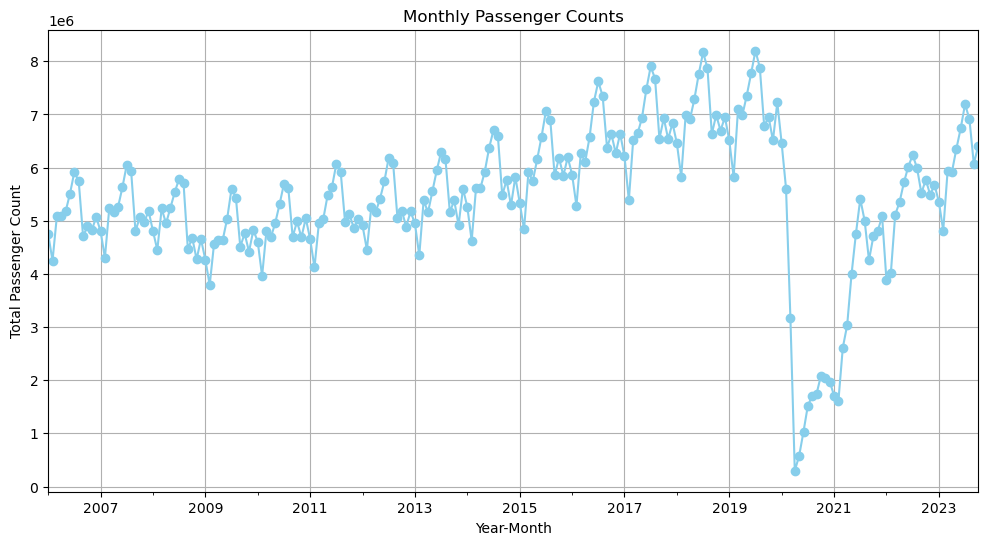

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'RPTDate' is already in datetime format
proj1['RPTDate'] = pd.to_datetime(proj1['RPTDate'])

# Extract month and year from 'RPTDate'
proj1['YearMonth'] = proj1['RPTDate'].dt.to_period('M')

# Group by YearMonth and sum the passenger counts
monthly_passenger_counts = proj1.groupby('YearMonth')['Passenger_Count'].sum()

# Plot the monthly passenger counts
plt.figure(figsize=(12, 6))
monthly_passenger_counts.plot(marker='o', linestyle='-', color='skyblue')
plt.title('Monthly Passenger Counts')
plt.xlabel('Year-Month')
plt.ylabel('Total Passenger Count')
plt.grid(True)
plt.show()


Month
January       90822245
February      81506426
March         95792352
April         92501690
May           98599619
June         106082478
July         113643272
August       110513176
September     93635232
October       98524718
November      87341441
December      93007723
Name: Passenger_Count, dtype: int64


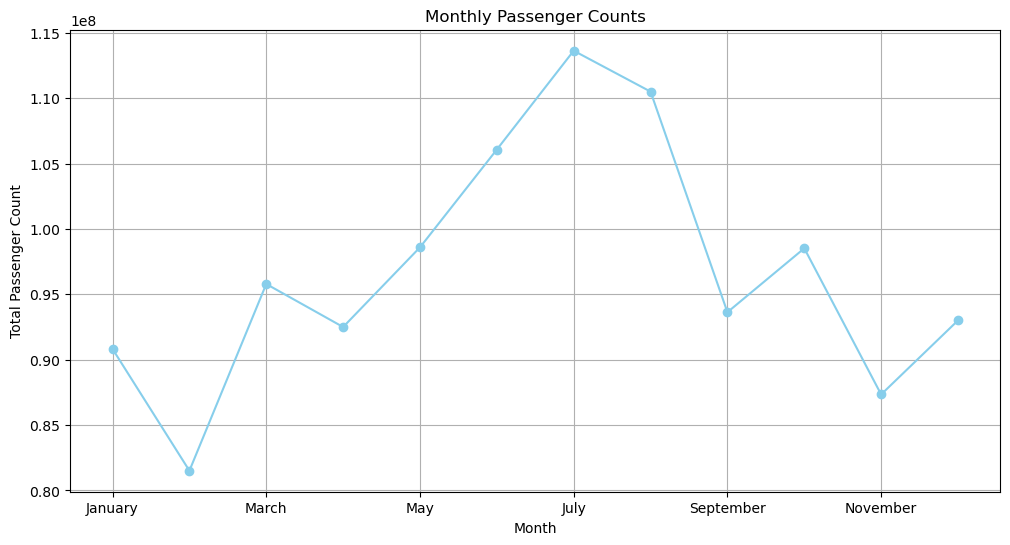

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'RPTDate' is already in datetime format
proj1['RPTDate'] = pd.to_datetime(proj1['RPTDate'])

# Extract month from 'RPTDate'
proj1['Month'] = proj1['RPTDate'].dt.month_name()

# Group by Month and sum the passenger counts
monthly_passenger_counts = proj1.groupby('Month')['Passenger_Count'].sum()

# Sort the months in chronological order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_passenger_counts = monthly_passenger_counts.reindex(months_order)

print(monthly_passenger_counts)
# Plot the monthly passenger counts
plt.figure(figsize=(12, 6))
monthly_passenger_counts.plot(marker='o', linestyle='-', color='skyblue')
plt.title('Monthly Passenger Counts')
plt.xlabel('Month')
plt.ylabel('Total Passenger Count')
plt.grid(True)
plt.show()


In [160]:
proj1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7097 entries, 0 to 7882
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DataExtractDate         7097 non-null   datetime64[ns]
 1   ReportPeriod            7097 non-null   datetime64[ns]
 2   Terminal                7097 non-null   object        
 3   Arrival_Departure       7097 non-null   category      
 4   Domestic_International  7097 non-null   category      
 5   Passenger_Count         7097 non-null   int64         
 6   EXDate                  7097 non-null   object        
 7   EXTime                  7097 non-null   object        
 8   RPTDate                 7097 non-null   datetime64[ns]
 9   Hour                    7097 non-null   int32         
 10  YearMonth               7097 non-null   period[M]     
 11  Month                   7097 non-null   object        
dtypes: category(2), datetime64[ns](3), int32(1), int64(1)

In [167]:
import pandas as pd

# Assuming 'proj1' is your DataFrame
# Select relevant categorical columns
categorical_columns = ['Arrival_Departure', 'Domestic_International']

print(categorical_columns)
# Display the count of each category
category_counts = {}
for col in categorical_columns:
    category_counts[col] = proj1[col].value_counts()

# Display the counts
for col, counts in category_counts.items():
    print(f"Counts for {col}:")
    print(counts)
    print("\n")


['Arrival_Departure', 'Domestic_International']
Counts for Arrival_Departure:
Arrival_Departure
Departure    3663
Arrival      3434
Name: count, dtype: int64


Counts for Domestic_International:
Domestic_International
Domestic         3799
International    3298
Name: count, dtype: int64




### Advanced Analysis:

In [29]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report

In [30]:
# proj1['EXTime'] = proj1['EXTime'].astype(str)

# proj1['Day_Night_Indicator'] = proj1['EXTime'].apply(lambda x: 'Day' if 6 <= int(x.split(':')[0]) < 18 else 'Night')

In [31]:
# proj1['Passenger_Age'] = np.random.randint(18, 71, size=len(proj1))

In [32]:
# proj1_encoded = pd.get_dummies(proj1['Day_Night_Indicator'], drop_first=True)

# X = proj1_encoded
# y = proj1['Domestic_International']

# # Step 4: Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 5: Fit a Random Forest Classifier model
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Step 6: Predict flight types on the test set
# y_pred = model.predict(X_test)

# # Step 7: Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# print(f'Accuracy: {accuracy:.2f}')
# print('Classification Report:')
# print(classification_rep)